# Predicting Gym Crowdedness Using Stochastic Gradient Descent on Linear Regression

In this guided project my aim is to predict what is the best time to use a campus gym with minimal wait times and no crowds. I will achieve this by using SDGRegressor from the Scikit Learn library.

The dataset contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.

The dataset contains over 60,000 observations about how many people were at the gym on a particular day and time. It contains 11 columns that contain the following information:
- `number_people`: this is the number of people at the gym at each observation. This is the target variable or label.
- `date`: a string value with the specific date and time information.
- `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
- `dayofweek`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
- `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
- `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
- `temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.
- `isstartof_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
- `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
- `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
- `hour`: an integer (int) for the hour of the day from 0 to 23.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gym = pd.read_csv('data/crowdness_gym_data.csv')

### Exploratory Data Analysis

In [11]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


D:\TEMP\ipykernel_5004\530566109.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = gym.corr()


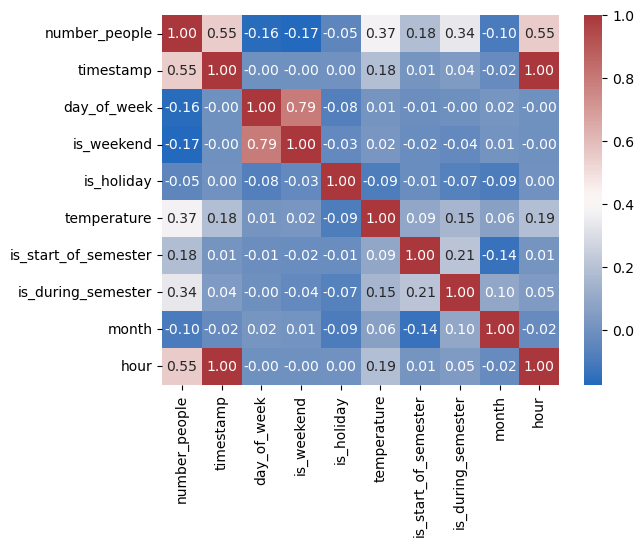

In [12]:
correlations = gym.corr()
sns.heatmap(correlations, annot=True, fmt='.2f', cmap="vlag")
plt.show()

`timestamp` and `hour` have 55% correlation with `number_people`.  
`temperature` and `is_during_semester` have over 30% correlation with `number_people`.  


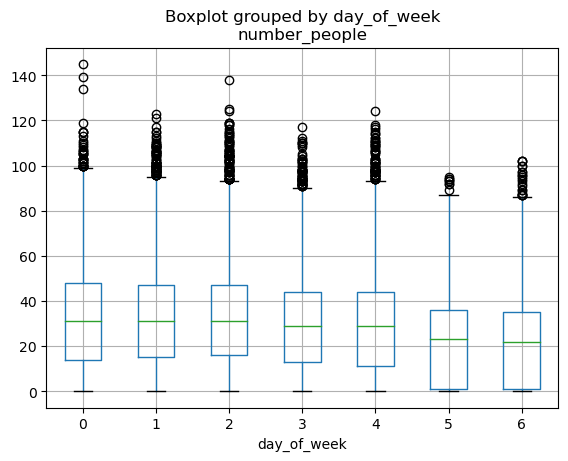

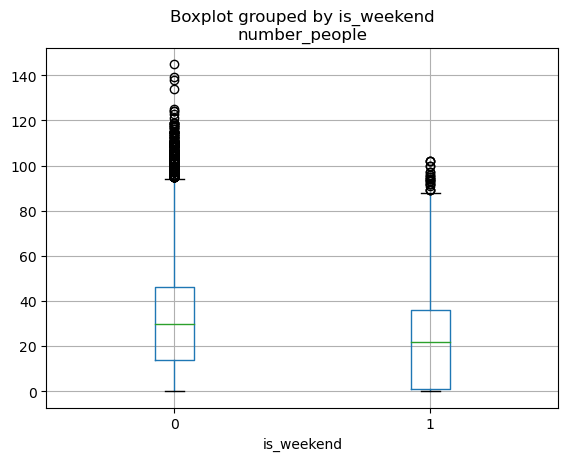

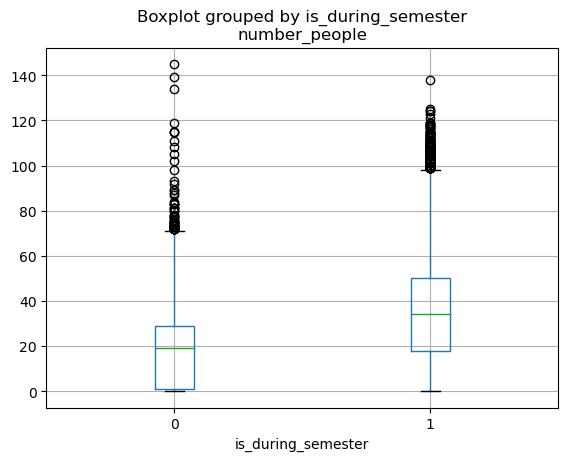

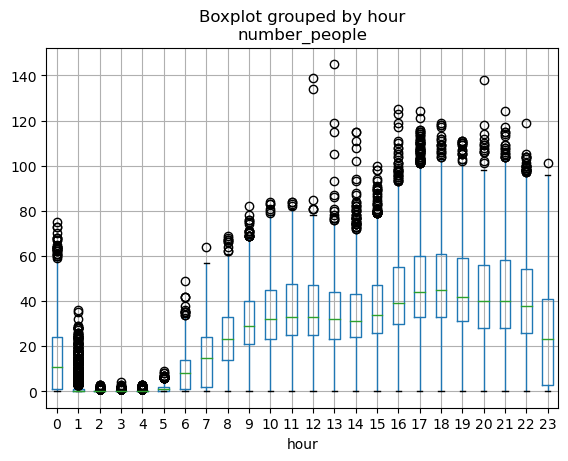

In [13]:
cat_vars = ['day_of_week', 'is_weekend', 'is_during_semester', 'hour']

for cat in cat_vars:
    gym.boxplot(column='number_people', by=cat)
    plt.show()

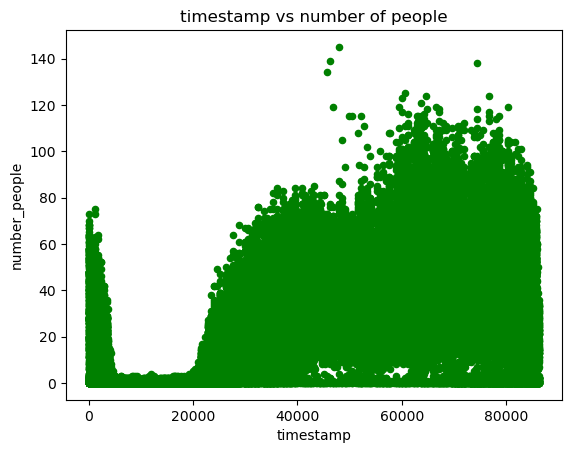

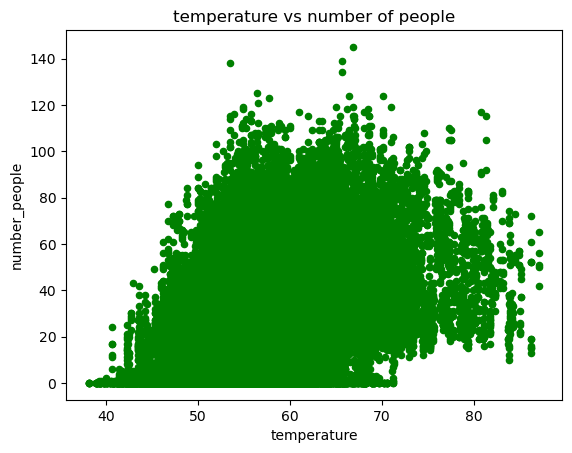

In [14]:
con_vars = ['timestamp', 'temperature']

for con in con_vars:
    gym.plot.scatter(con, 'number_people', c='green')
    plt.title(f'{con} vs number of people')
    plt.show()

`hour` and `timestamp` are different representations of the same data. I will keep `hour` as it has a good correlation with the target. I will remove `timestamp` I will not want to predict crowdedness to the second for this project.  
`temperature` and `is_during_semester` also have good correlation and will be included.  
`day_of_week` is an important column for this project, so will be included.  
all other columns will be excluded leving my list of predictors as:
- `hour`
- `temperature`
- `is_during_semester`
- `day_of_week`

### Preparing the Model

In [15]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

X = gym.drop(columns=['timestamp', 'date'])
y = gym['number_people']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

In [16]:
model = SGDRegressor()
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

### Model Performance

In [17]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse:.2f}. MAE: {mae:.2f}. R2 score: {r2:.2f}')

MSE: 0.47. MAE: 0.19. R2 score: 1.00


### Visualise the Results

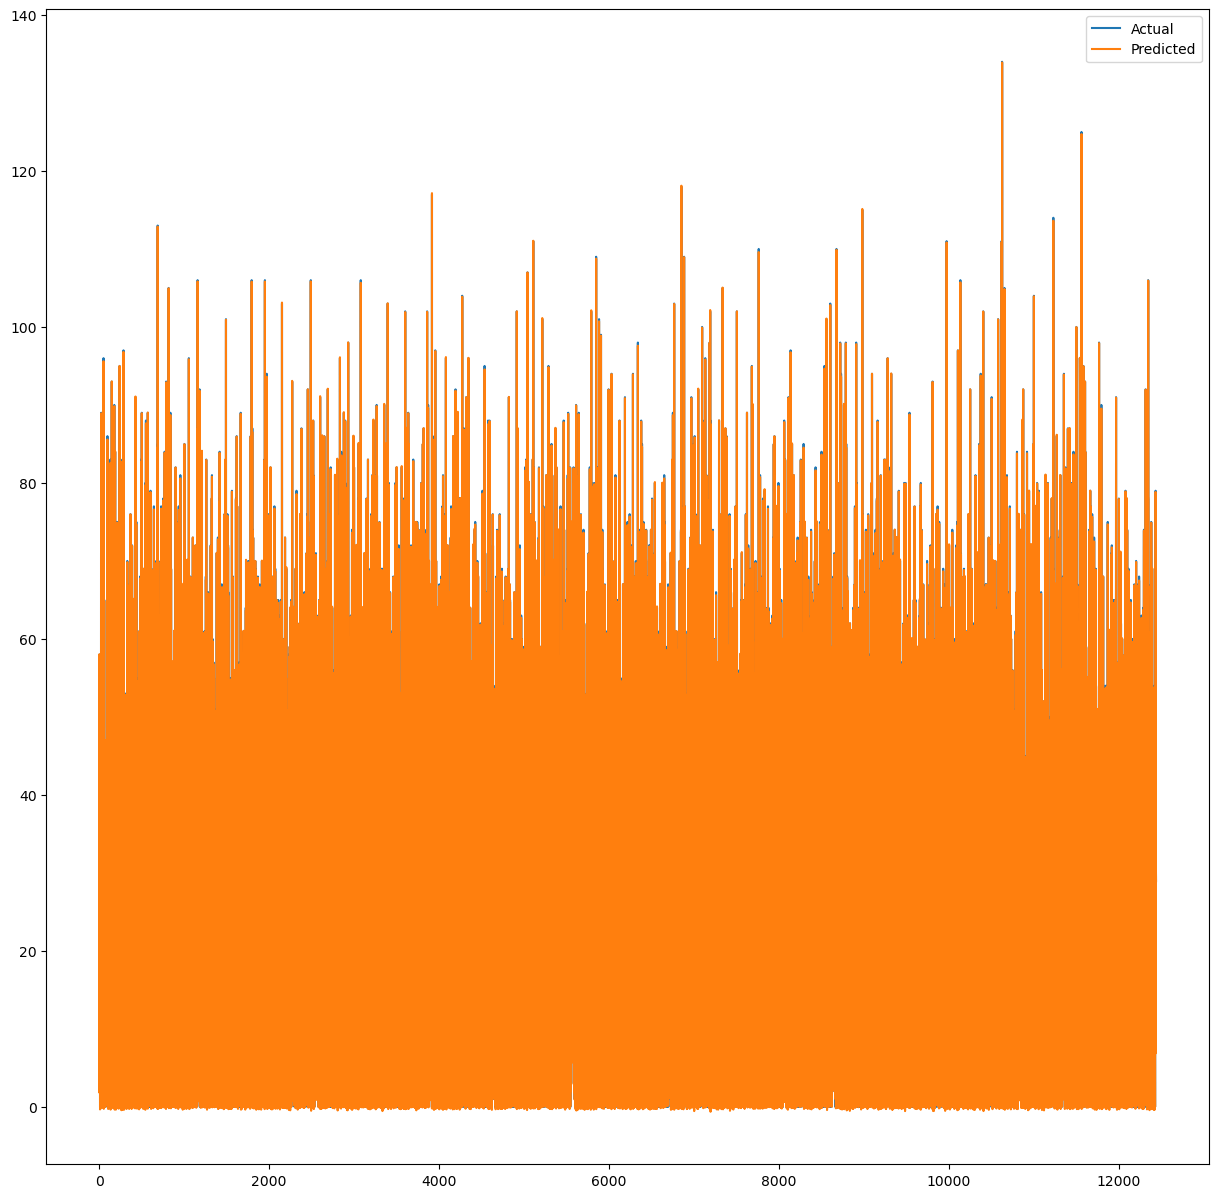

In [18]:

plt.figure(figsize=(15, 15))

plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), predictions, label='Predicted')
plt.legend()
plt.show()

### Summary

We can clearly see there is a lot of room for improvement. However, a linear regression model using Stochastic Gradient Descent is a good place to start for building such a prediction model.

We can improve the model by making some changes. Regarding the data, I decided to remove the timestamp variable since I believed it to be redundant, nonetheless, maybe that redundancy might help the model get higher accuracy.

Also, I might changing and testing other hyperparameters might be interesting, especially changing the loss function from huber to squared_epsilon_insensitive and maybe exploring changing the learning rate and penalty.